In [61]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from geopy.geocoders import Nominatim
from sklearn.cluster import KMeans
    
sns.set(rc = {'figure.figsize':(16,14)})
pd.options.display.float_format = '{:.4f}'.format
import folium
from folium import Choropleth, Circle, Marker
from folium.plugins import HeatMap, MarkerCluster

In [38]:
data = pd.read_csv('Mumbai.csv')
data

,Price,Area,Location,No. of Bedrooms,Resale,MaintenanceStaff,Gymnasium,SwimmingPool,LandscapedGardens,JoggingTrack,...,LiftAvailable,BED,VaastuCompliant,Microwave,GolfCourse,TV,DiningTable,Sofa,Wardrobe,Refrigerator
0,4850000,720,Kharghar,1,1,1,0,0,0,0,...,1,0,1,0,0,0,0,0,0,0
1,4500000,600,Kharghar,1,1,1,1,1,0,1,...,1,0,1,0,0,0,0,0,0,0
2,6700000,650,Kharghar,1,1,1,1,1,0,1,...,1,0,1,0,0,0,0,0,0,0
3,4500000,650,Kharghar,1,1,1,0,0,1,0,...,1,1,1,0,0,0,0,0,1,0
4,5000000,665,Kharghar,1,1,1,0,0,1,0,...,1,0,1,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7714,14500000,1180,Mira Road East,2,0,9,9,9,9,9,...,9,9,9,9,9,9,9,9,9,9
7715,14500000,530,Naigaon East,1,1,9,9,9,9,9,...,9,9,9,9,9,9,9,9,9,9
7716,4100000,700,Shirgaon,1,0,9,9,9,9,9,...,9,9,9,9,9,9,9,9,9,9
7717,2750000,995,Mira Road East,2,0,9,9,9,9,9,...,9,9,9,9,9,9,9,9,9,9


In [39]:
data.dropna(inplace=True)
data.sort_values(by='Location', inplace=True)

In [40]:
data.describe()

,Price,Area,No. of Bedrooms,Resale,MaintenanceStaff,Gymnasium,SwimmingPool,LandscapedGardens,JoggingTrack,RainWaterHarvesting,...,LiftAvailable,BED,VaastuCompliant,Microwave,GolfCourse,TV,DiningTable,Sofa,Wardrobe,Refrigerator
count,7719.0000,7719.0000,7719.0000,7719.0000,7719.0000,7719.0000,7719.0000,7719.0000,7719.0000,7719.0000,...,7719.0000,7719.0000,7719.0000,7719.0000,7719.0000,7719.0000,7719.0000,7719.0000,7719.0000,7719.0000
mean,15061652.3962,998.4092,1.9133,0.6471,7.4989,7.4739,7.4379,7.4416,7.4394,7.4770,...,7.5183,7.4179,7.4547,7.3721,7.3797,7.3791,7.3736,7.3745,7.3840,7.3748
std,20520999.9037,550.9678,0.8554,0.4779,3.1979,3.2521,3.3282,3.3204,3.3250,3.2454,...,3.1550,3.3695,3.2929,3.4621,3.4469,3.4482,3.4590,3.4572,3.4383,3.4567
min,2000000.0000,200.0000,1.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,...,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000
25%,5300000.0000,650.0000,1.0000,0.0000,9.0000,9.0000,9.0000,9.0000,9.0000,9.0000,...,9.0000,9.0000,9.0000,9.0000,9.0000,9.0000,9.0000,9.0000,9.0000,9.0000
50%,9500000.0000,900.0000,2.0000,1.0000,9.0000,9.0000,9.0000,9.0000,9.0000,9.0000,...,9.0000,9.0000,9.0000,9.0000,9.0000,9.0000,9.0000,9.0000,9.0000,9.0000
75%,17000000.0000,1177.0000,2.0000,1.0000,9.0000,9.0000,9.0000,9.0000,9.0000,9.0000,...,9.0000,9.0000,9.0000,9.0000,9.0000,9.0000,9.0000,9.0000,9.0000,9.0000
max,420000000.0000,8511.0000,7.0000,1.0000,9.0000,9.0000,9.0000,9.0000,9.0000,9.0000,...,9.0000,9.0000,9.0000,9.0000,9.0000,9.0000,9.0000,9.0000,9.0000,9.0000


**The value 9 that we can see in a majority of the columns represents missing values but it may create confusion since it represents a positive value, hence it is replaced with -1 later on**

In [41]:
data.columns

Index(['Price', 'Area', 'Location', 'No. of Bedrooms', 'Resale',
       'MaintenanceStaff', 'Gymnasium', 'SwimmingPool', 'LandscapedGardens',
       'JoggingTrack', 'RainWaterHarvesting', 'IndoorGames', 'ShoppingMall',
       'Intercom', 'SportsFacility', 'ATM', 'ClubHouse', 'School',
       '24X7Security', 'PowerBackup', 'CarParking', 'StaffQuarter',
       'Cafeteria', 'MultipurposeRoom', 'Hospital', 'WashingMachine',
       'Gasconnection', 'AC', 'Wifi', 'Children'splayarea', 'LiftAvailable',
       'BED', 'VaastuCompliant', 'Microwave', 'GolfCourse', 'TV',
       'DiningTable', 'Sofa', 'Wardrobe', 'Refrigerator'],
      dtype='object')

In [42]:
data.dtypes

Price                   int64
Area                    int64
Location               object
No. of Bedrooms         int64
Resale                  int64
MaintenanceStaff        int64
Gymnasium               int64
SwimmingPool            int64
LandscapedGardens       int64
JoggingTrack            int64
RainWaterHarvesting     int64
IndoorGames             int64
ShoppingMall            int64
Intercom                int64
SportsFacility          int64
ATM                     int64
ClubHouse               int64
School                  int64
24X7Security            int64
PowerBackup             int64
CarParking              int64
StaffQuarter            int64
Cafeteria               int64
MultipurposeRoom        int64
Hospital                int64
WashingMachine          int64
Gasconnection           int64
AC                      int64
Wifi                    int64
Children'splayarea      int64
LiftAvailable           int64
BED                     int64
VaastuCompliant         int64
Microwave 

In [43]:
data['No. of Bedrooms'].unique()

array([2, 1, 4, 3, 6, 5, 7], dtype=int64)

In [44]:
data['Resale'].unique()

array([1, 0], dtype=int64)

In [45]:
data = data.replace(9,-1)
data

,Price,Area,Location,No. of Bedrooms,Resale,MaintenanceStaff,Gymnasium,SwimmingPool,LandscapedGardens,JoggingTrack,...,LiftAvailable,BED,VaastuCompliant,Microwave,GolfCourse,TV,DiningTable,Sofa,Wardrobe,Refrigerator
454,35000000,800,15th Road,2,1,0,0,0,0,0,...,0,1,0,1,0,1,1,1,1,1
1193,18000000,675,4 Bunglows,2,1,1,1,0,0,0,...,1,1,0,0,0,0,0,0,0,0
1810,25000000,1350,4 Bunglows,2,1,-1,-1,-1,-1,-1,...,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1
1785,25000000,1350,4 Bunglows,2,1,-1,-1,-1,-1,-1,...,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1
6529,8400000,570,Adaigaon,1,1,-1,-1,-1,-1,-1,...,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5200,8500000,1735,vile parle west,3,0,-1,-1,-1,-1,-1,...,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1
4770,10000000,1073,vile parle west,2,0,-1,-1,-1,-1,-1,...,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1
2247,5700000,545,vrindavan society,1,1,-1,-1,-1,-1,-1,...,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1
1979,80000000,3200,worli sea Fase,5,1,-1,-1,-1,-1,-1,...,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1


In [46]:
data['Price'].corr(data['No. of Bedrooms'])

0.27204776946271547

In [47]:
data['Price'].corr(data['Area'])

0.2991718341624165

In [48]:

location_groups = data.groupby('Location')
location_groups.head()

,Price,Area,Location,No. of Bedrooms,Resale,MaintenanceStaff,Gymnasium,SwimmingPool,LandscapedGardens,JoggingTrack,...,LiftAvailable,BED,VaastuCompliant,Microwave,GolfCourse,TV,DiningTable,Sofa,Wardrobe,Refrigerator
454,35000000,800,15th Road,2,1,0,0,0,0,0,...,0,1,0,1,0,1,1,1,1,1
1193,18000000,675,4 Bunglows,2,1,1,1,0,0,0,...,1,1,0,0,0,0,0,0,0,0
1810,25000000,1350,4 Bunglows,2,1,-1,-1,-1,-1,-1,...,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1
1785,25000000,1350,4 Bunglows,2,1,-1,-1,-1,-1,-1,...,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1
6529,8400000,570,Adaigaon,1,1,-1,-1,-1,-1,-1,...,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2950,6700000,1400,vile parle west,3,1,-1,-1,-1,-1,-1,...,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1
4769,33500000,1509,vile parle west,3,0,-1,-1,-1,-1,-1,...,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1
2247,5700000,545,vrindavan society,1,1,-1,-1,-1,-1,-1,...,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1
1979,80000000,3200,worli sea Fase,5,1,-1,-1,-1,-1,-1,...,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1


In [49]:
df1 = data[['Price','Location']]
df1['count'] = 1
counter = df1.groupby('Location', sort=False).sum()
counter['Avg_price'] = counter['Price']/counter['count']
counter.sort_values(by='count',inplace=True)
counter = counter[counter['count']>20]
expensive = counter.sort_values(by=['Avg_price'],ascending=False)

counter.tail(20)

<ipython-input-49-4768b581d7aa>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['count'] = 1


,Price,count,Avg_price
Location,,,
Mulund West,1385671997,79,17540151.8608
Malad East,1803173996,92,19599717.3478
Andheri East,1704884000,95,17946147.3684
Goregaon West,1660086000,100,16600860.0000
Kamothe,1425735000,120,11881125.0000
Kandivali West,1983939998,127,15621574.7874
Virar,968545992,137,7069678.7737
Kandivali East,3021226996,168,17983494.0238
Chembur,3198053996,174,18379620.6667


In [50]:
expensive.head(20)

,Price,count,Avg_price
Location,,,
Worli,1566347999,24,65264499.9583
Parel,1525474998,39,39114743.5385
matunga east,751900000,21,35804761.9048
Bandra West,799276000,24,33303166.6667
Andheri West,5942914994,189,31443994.6772
Juhu,1166500999,41,28451243.8780
Ville Parle East,2040200000,74,27570270.2703
Wadala,668849998,26,25724999.9231
Santacruz East,562900000,22,25586363.6364


In [51]:
expensive.tail(20)

,Price,count,Avg_price
Location,,,
Karanjade,338849000,33,10268151.5152
Titwala,265901999,26,10226999.9615
Sector 17 Ulwe,363554998,36,10098749.9444
Ulwe,3944783995,391,10088961.6240
Panvel,1793589996,180,9964388.8667
Sector 20 Kharghar,323600000,34,9517647.0588
Kalyan West,1825520998,197,9266604.0508
Kalwa,321425999,35,9183599.9714
Vasai,423473000,48,8822354.1667


In [52]:
big_groups = ['Goregaon West', 'Kandivali West','Kandivali East','Malad West','Andheri West','Andheri East','Borivali West']
len(big_groups)

7

In [53]:
data_subset = location_groups.get_group('Goregaon West')
for i in range(1,len(big_groups)):
    x = location_groups.get_group(big_groups[i])
    
    data_subset =  data_subset.append(x)
data_subset

,Price,Area,Location,No. of Bedrooms,Resale,MaintenanceStaff,Gymnasium,SwimmingPool,LandscapedGardens,JoggingTrack,...,LiftAvailable,BED,VaastuCompliant,Microwave,GolfCourse,TV,DiningTable,Sofa,Wardrobe,Refrigerator
4128,11000000,885,Goregaon West,2,1,-1,-1,-1,-1,-1,...,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1
4127,12600000,510,Goregaon West,1,1,-1,-1,-1,-1,-1,...,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1
6609,4900000,1650,Goregaon West,3,0,-1,-1,-1,-1,-1,...,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1
6058,16000000,650,Goregaon West,1,1,-1,-1,-1,-1,-1,...,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1
6606,26000000,1050,Goregaon West,3,1,-1,-1,-1,-1,-1,...,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3934,25600000,750,Borivali West,2,1,-1,-1,-1,-1,-1,...,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1
3986,14500000,750,Borivali West,1,1,-1,-1,-1,-1,-1,...,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1
3862,25000000,570,Borivali West,1,1,-1,-1,-1,-1,-1,...,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1
7309,20299999,560,Borivali West,1,1,-1,-1,-1,-1,-1,...,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1


Text(0.5, 1.0, 'Distribution of price of the house based on Location')

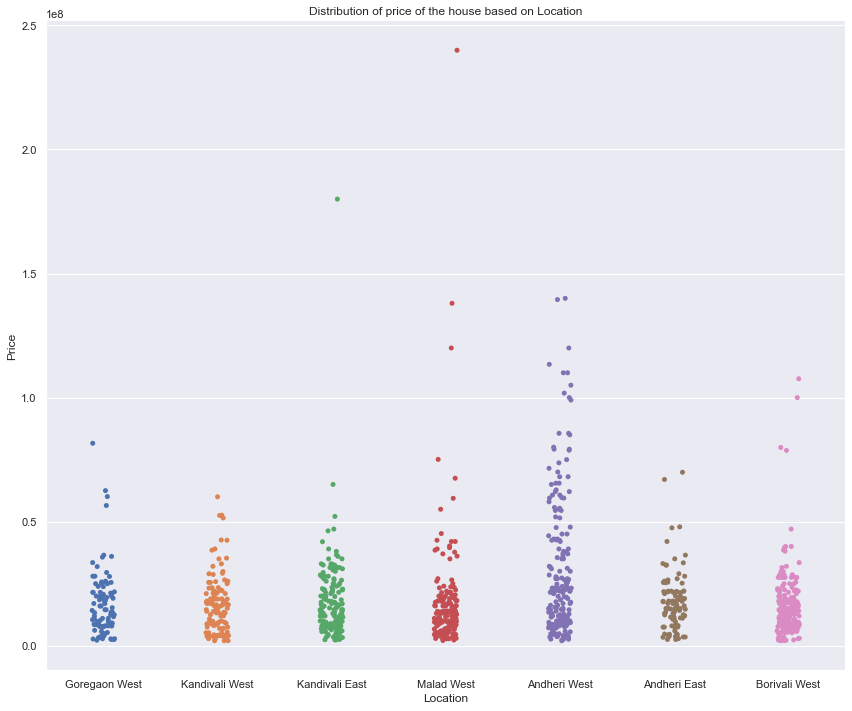

In [54]:
sns.catplot(x='Location', y='Price',  data=data_subset, height =10, aspect=1.2 )
plt.xlabel('Location')
plt.ylabel('Price')
plt.title("Distribution of price of the house based on Location" , fontsize=12)

C:\Users\Dev Panghate\anaconda3\lib\site-packages\seaborn\regression.py:581: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


Text(0.5, 1.0, 'Relationship between Area of house and  Selling Price')

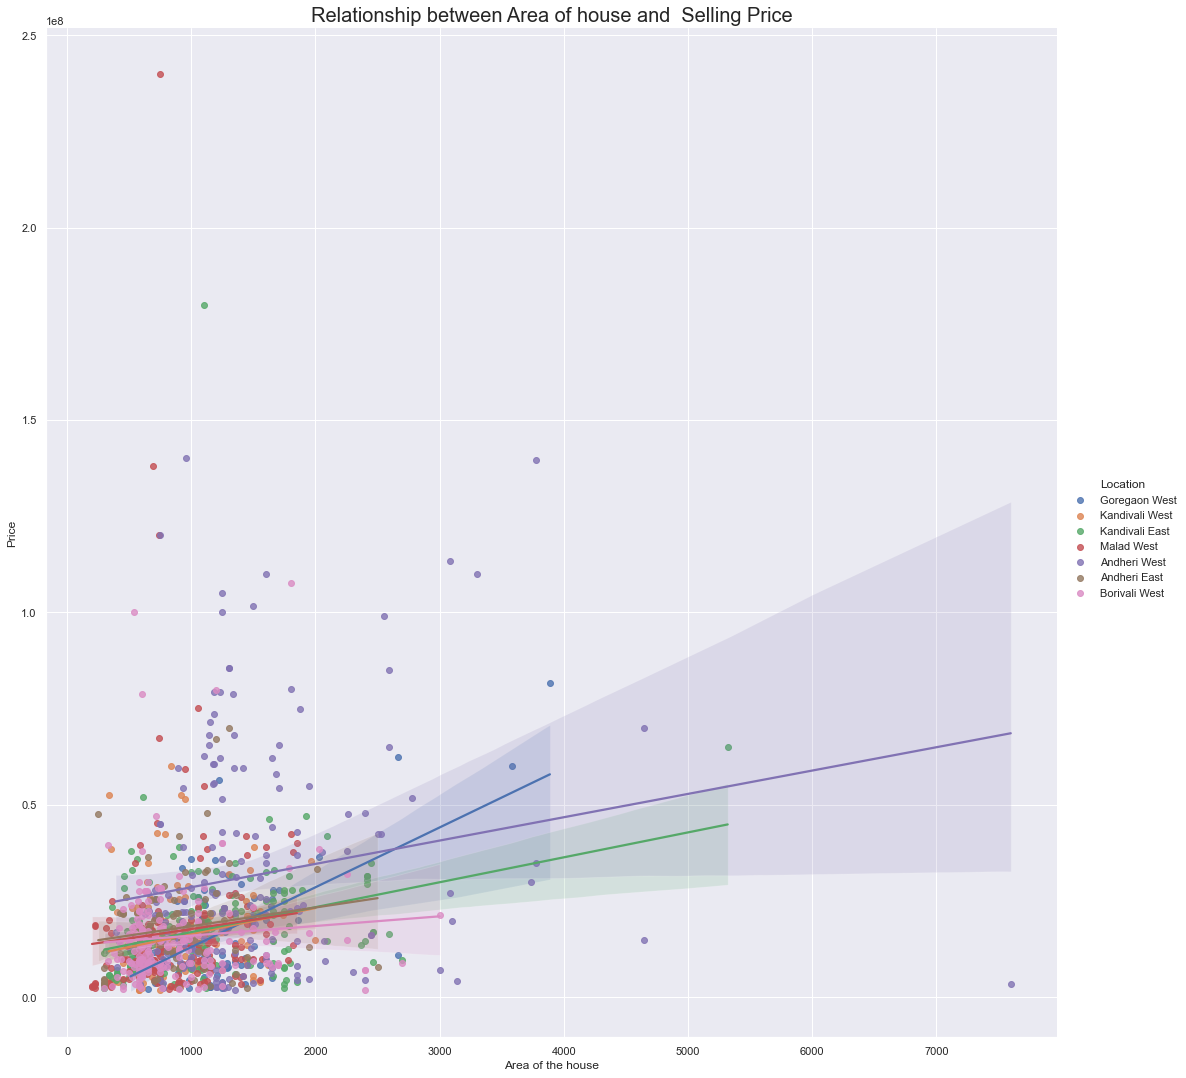

In [55]:
sns.lmplot(x='Area', y='Price', hue='Location',  data=data_subset, size= 15)
plt.xlabel('Area of the house')
plt.ylabel('Price')
plt.title("Relationship between Area of house and  Selling Price", fontsize=20)

In [56]:
x = data['Location']
counter={}
arr= []
for i in x:
    if counter.get(i)==None:
        counter[i]=1
        arr.append(i)
        


In [57]:
Location=Nominatim(user_agent="http")

def get_lat_lon(df):
    latitude = []
    longitude = []
    count=0
    df['Latitude'] = -1
    df['Longitude'] = -1
    x = data['Location']
    counter={}
    arr= []
    for i in x:
        if counter.get(i)==None:
            counter[i]=1
            arr.append(i)
            
    for i in arr: 
        coordinates = Location.geocode(i)
        print(count,end=' ')
        count+=1
         
        try:
            data.loc[data['Location']==i,'Latitude'] = coordinates.latitude
            data.loc[data['Location']==i,'Longitude'] = coordinates.longitude
            
        except:
            
            data.loc[data['Location']==i,'Latitude'] = 'NA'
            data.loc[data['Location']==i,'Longitude'] = 'NA'
        
    
    

In [58]:
get_lat_lon(data)
data

0 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71 72 73 74 75 76 77 78 79 80 81 82 83 84 85 86 87 88 89 90 91 92 93 94 95 96 97 98 99 100 101 102 103 104 105 106 107 108 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125 126 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143 144 145 146 147 148 149 150 151 152 153 154 155 156 157 158 159 160 161 162 163 164 165 166 167 168 169 170 171 172 173 174 175 176 177 178 179 180 181 182 183 184 185 186 187 188 189 190 191 192 193 194 195 196 197 198 199 200 201 202 203 204 205 206 207 208 209 210 211 212 213 214 215 216 217 218 219 220 221 222 223 224 225 226 227 228 229 230 231 232 233 234 235 236 237 238 239 240 241 242 243 244 245 246 247 248 249 250 251 252 253 254 255 256 257 258 259 260 261 262 263 264 265 266 267 268 269 270 271 272 273 274 275 276 27

,Price,Area,Location,No. of Bedrooms,Resale,MaintenanceStaff,Gymnasium,SwimmingPool,LandscapedGardens,JoggingTrack,...,VaastuCompliant,Microwave,GolfCourse,TV,DiningTable,Sofa,Wardrobe,Refrigerator,Latitude,Longitude
454,35000000,800,15th Road,2,1,0,0,0,0,0,...,0,1,0,1,1,1,1,1,40.7871,-73.7777
1193,18000000,675,4 Bunglows,2,1,1,1,0,0,0,...,0,0,0,0,0,0,0,0,19.0445,72.9101
1810,25000000,1350,4 Bunglows,2,1,-1,-1,-1,-1,-1,...,-1,-1,-1,-1,-1,-1,-1,-1,19.0445,72.9101
1785,25000000,1350,4 Bunglows,2,1,-1,-1,-1,-1,-1,...,-1,-1,-1,-1,-1,-1,-1,-1,19.0445,72.9101
6529,8400000,570,Adaigaon,1,1,-1,-1,-1,-1,-1,...,-1,-1,-1,-1,-1,-1,-1,-1,NA,NA
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5200,8500000,1735,vile parle west,3,0,-1,-1,-1,-1,-1,...,-1,-1,-1,-1,-1,-1,-1,-1,19.1039,72.8403
4770,10000000,1073,vile parle west,2,0,-1,-1,-1,-1,-1,...,-1,-1,-1,-1,-1,-1,-1,-1,19.1039,72.8403
2247,5700000,545,vrindavan society,1,1,-1,-1,-1,-1,-1,...,-1,-1,-1,-1,-1,-1,-1,-1,19.0512,72.8681
1979,80000000,3200,worli sea Fase,5,1,-1,-1,-1,-1,-1,...,-1,-1,-1,-1,-1,-1,-1,-1,NA,NA


In [59]:
data.replace('NA', np.nan,inplace=True)
data.dropna(inplace=True)


In [63]:
city_map = folium.Map(location=[19.08,72.74], zoom_start=10, tiles='cartodbpositron')

mc=MarkerCluster()
for idx, row in data.iterrows():
    mc.add_child(Marker((row['Latitude'], row['Longitude'])))
    
city_map.add_child(mc)
city_map

In [64]:
data.replace(-1, np.nan,inplace=True)
data.dropna(inplace=True)


C:\Users\Dev Panghate\anaconda3\lib\site-packages\seaborn\regression.py:581: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


Text(0.5, 1.0, 'Relationship between Area of house and  Selling Price')

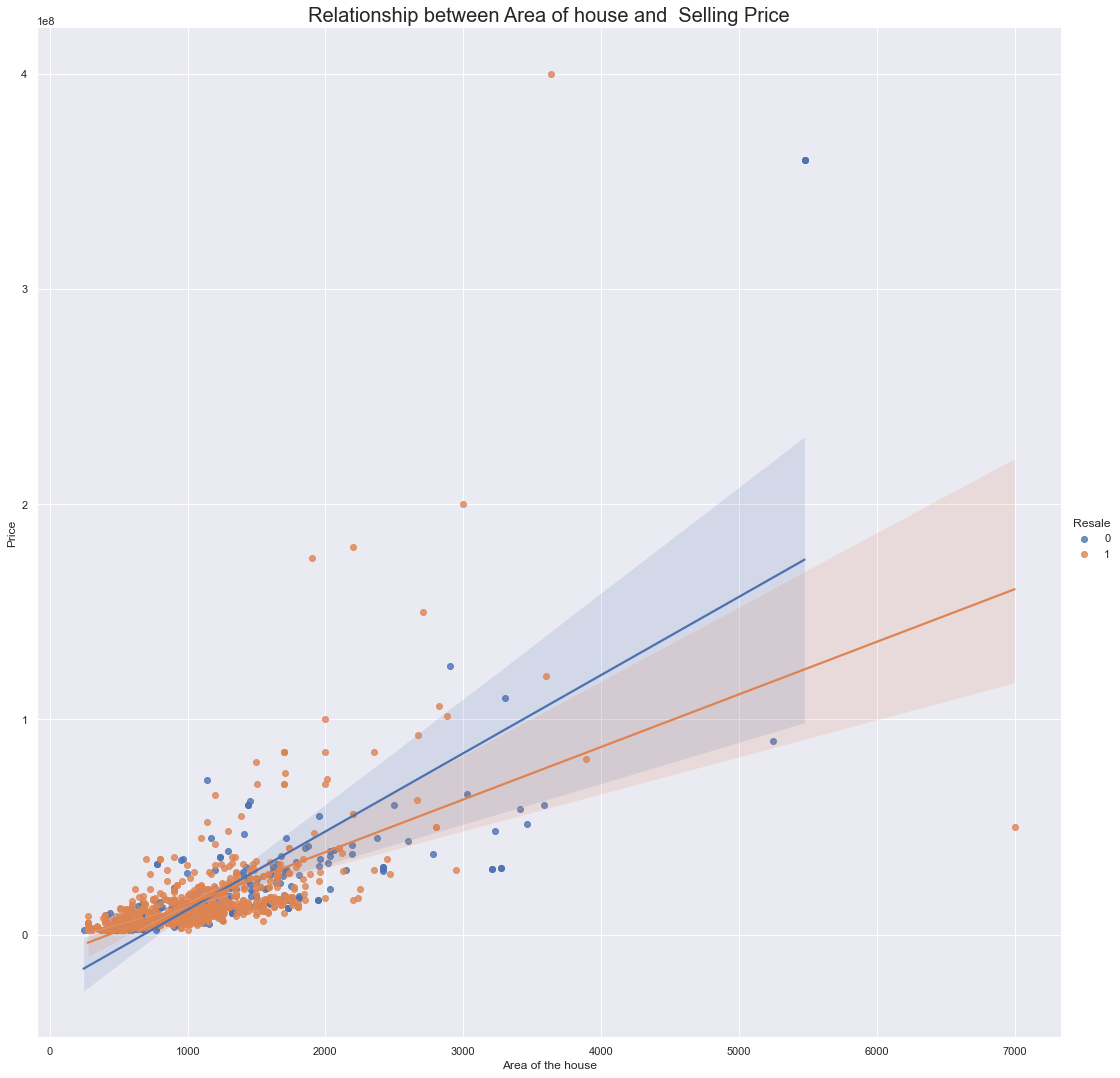

In [65]:
sns.lmplot(x='Area', y='Price', hue='Resale',  data=data, size= 15)
plt.xlabel('Area of the house')
plt.ylabel('Price')
plt.title("Relationship between Area of house and  Selling Price", fontsize=20)

As we can see from the plot, we cannot observe a significant difference in price for homes which were new or being resold

In [67]:
data['Amenities'] = data.iloc[:,5:-3].sum(axis=1)
data['Amenities']

454    10.0000
1193    7.0000
1397   16.0000
1396    4.0000
1197    6.0000
         ...  
812     6.0000
1295   16.0000
286     0.0000
1375    0.0000
828     7.0000
Name: Amenities, Length: 1225, dtype: float64

Text(0.5, 1.0, 'Relationship between Amenities of the house and  Selling Price')

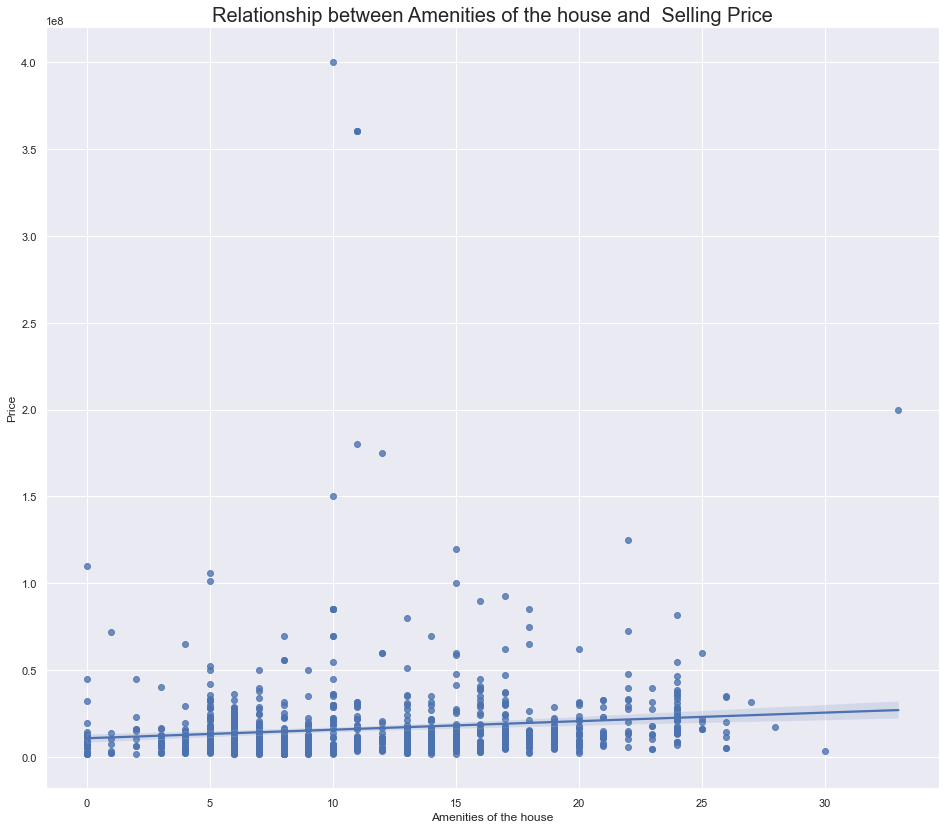

In [68]:
sns.regplot(x='Amenities', y='Price',   data=data)
plt.xlabel('Amenities of the house')
plt.ylabel('Price')
plt.title("Relationship between Amenities of the house and  Selling Price", fontsize=20)

From the above plot, we an say that the presence of multiple amenities near the house does have a positive effect on the price of the house. The regression line shows an slight increse in the price of homes with more ameninities